***A. Data Cleaning and Pre-processing***

In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install gender_guesser

In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import os
import glob
import numpy as np

import random
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.options.display.max_rows=4000
pd.options.display.max_columns= None

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
"""
path = "/content/drive/My Drive/data"
all_files = glob.glob(os.path.join(path, "*.xlsx"))

li = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)
    
frame=pd.concat(li, axis=0, ignore_index=True)

print(frame.head())

"""

'\npath = "/content/drive/My Drive/data"\nall_files = glob.glob(os.path.join(path, "*.xlsx"))\n\nli = []\n\nfor filename in all_files:\n    df = pd.read_excel(filename, index_col=None, header=0)\n    li.append(df)\n    \nframe=pd.concat(li, axis=0, ignore_index=True)\n\nprint(frame.head())\n\n'

In [ ]:
"""
frame.to_pickle("/content/drive/My Drive/data/frame.pkl")
"""

'\nframe.to_pickle("/content/drive/My Drive/data/frame.pkl")\n'

In [ ]:
frame = pd.read_pickle('/content/drive/My Drive/data/frame.pkl')

In [ ]:
#Dataframe statistics
frame.describe()

,Query Id,Average Visits per Visitor,Backlinks,Blog Comments,Facebook Comments,Facebook Likes,Facebook Role,Facebook Shares,Forum Views,Impressions,Instagram Comments,Instagram Followers,Instagram Following,Instagram Likes,Instagram Posts,Kred Outreach,Last Assignment Date,Latitude,Percentage Female,Percentage Male,Priority,Resource Id,Total Monthly Visitors,Tracked Link Clicks,Tracked Links,Twitter Author ID,Twitter Channel Role,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Tweets,mozRank Score,Unnamed: 103
count,1.985200e+05,198520.000000,1.985200e+05,1.985200e+05,184515.0,198520.0,14005.0,184515.0,1.985200e+05,1.985200e+05,1.985200e+05,198520.000000,198520.000000,198520.000000,198520.000000,198520.000000,14005.000000,184515.000000,198520.000000,198520.000000,14005.000000,1.985200e+05,1.845150e+05,1.985200e+05,14005.0,1.682180e+05,1.278200e+04,1.845150e+05,1.985200e+05,198520.000000,184515.000000,1.985200e+05,184515.000000,14005.000000
mean,1.999102e+09,6.530491,4.246879e+07,3.223680e+06,0.0,0.0,0.0,0.0,3.885568e+02,7.142756e+03,3.687381e+02,29.913812,6.385901,1.831951,0.557022,41.871207,3.306176,7.225590,40.732828,49.317338,50.116030,1.169560e+11,5.790648e+09,3.929224e+08,0.0,6.918148e+16,2.488215e+16,5.655597e+03,1.564515e+03,72.972139,0.599149,2.199132e+04,9.389212,9.405717
std,1.054681e+01,4.376743,1.743013e+07,1.223465e+07,0.0,0.0,0.0,0.0,2.698299e+04,1.652276e+05,1.405137e+04,3267.732508,1265.836326,72.892636,38.775486,153.186080,3.322595,18.070599,13.482551,14.442224,14.094386,3.691259e+10,5.596327e+09,1.678807e+09,0.0,2.220257e+17,1.324519e+17,8.981149e+04,1.369412e+04,709.315789,28.418792,9.421524e+04,1.134759,0.988157
min,1.999102e+09,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.166100e+04,2.337300e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.999102e+09,6.000000,4.985073e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,9.900000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,54.000000,54.000000,1.051755e+11,6.000000e+09,0.000000e+00,0.0,1.309619e+08,7.799556e+07,1.500000e+02,1.710000e+02,0.000000,0.000000,5.470000e+02,9.600000,9.600000
50%,1.999102e+09,6.000000,4.985073e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,4.110000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,46.000000,54.000000,54.000000,1.237551e+11,6.000000e+09,0.000000e+00,0.0,4.260333e+08,3.092623e+08,4.450000e+02,4.230000e+02,0.000000,0.000000,4.958000e+03,9.600000,9.600000
75%,1.999102e+09,6.000000,4.985073e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,1.201000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,0.000000,46.000000,54.000000,54.000000,1.425853e+11,6.000000e+09,0.000000e+00,0.0,2.282636e+09,1.175378e+09,1.188000e+03,9.470000e+02,0.000000,0.000000,1.709400e+04,9.600000,9.600000
max,1.999102e+09,22.000000,4.985073e+07,4.985073e+07,0.0,0.0,0.0,0.0,7.131975e+06,3.795821e+07,3.144971e+06,441460.000000,324249.000000,12110.000000,8972.000000,998.000000,12.000000,74.867889,78.000000,100.000000,100.000000,1.567051e+11,1.000000e+11,1.000000e+11,0.0,9.136667e+17,7.811178e+17,8.593700e+06,3.140319e+06,129495.000000,6428.000000,2.090129e+06,9.600000,9.600000


Column names of the dataset

//add output

In [ ]:
#Dataframe column names
frame.columns.values.tolist()

['Query Id',
 'Query Name',
 'Date',
 'Title',
 'Snippet',
 'Url',
 'Domain',
 'Sentiment',
 'Page Type',
 'Language',
 'Country Code',
 'Continent Code',
 'Continent',
 'Country',
 'State Code',
 'County Code',
 'City Code',
 'Account Type',
 'Assignment',
 'Author',
 'Author City',
 'Author City Code',
 'Author Continent',
 'Author Continent Code',
 'Author Country',
 'Author Country Code',
 'Author County',
 'Author County Code',
 'Author Location',
 'Author State',
 'Author State Code',
 'Avatar',
 'Average Pages per Visitor',
 'Average Visits per Visitor',
 'Backlinks',
 'Blog Comments',
 'Category Details',
 'Checked',
 'City',
 'County',
 'Display URLs',
 'Engagement Score',
 'Expanded URLs',
 'Facebook Author ID',
 'Facebook Comments',
 'Facebook Likes',
 'Facebook Role',
 'Facebook Shares',
 'Facebook Subtype',
 'Forum Posts',
 'Forum Views',
 'Full Name',
 'Gender',
 'Hashtags',
 'Impact',
 'Impressions',
 'Instagram Comments',
 'Instagram Followers',
 'Instagram Following',


In [ ]:
#Drop Facebook, Instagram and Forum column names
dfraw=frame.copy()
frame = frame[frame.columns.drop(list(frame.filter(regex="Facebook")))]
frame = frame[frame.columns.drop(list(frame.filter(regex="Instagram")))]
frame = frame[frame.columns.drop(list(frame.filter(regex="Forum")))]
frame.columns

Index(['Query Id', 'Query Name', 'Date', 'Title', 'Snippet', 'Url', 'Domain',
       'Sentiment', 'Page Type', 'Language', 'Country Code', 'Continent Code',
       'Continent', 'Country', 'State Code', 'County Code', 'City Code',
       'Account Type', 'Assignment', 'Author', 'Author City',
       'Author City Code', 'Author Continent', 'Author Continent Code',
       'Author Country', 'Author Country Code', 'Author County',
       'Author County Code', 'Author Location', 'Author State',
       'Author State Code', 'Avatar', 'Average Pages per Visitor',
       'Average Visits per Visitor', 'Backlinks', 'Blog Comments',
       'Category Details', 'Checked', 'City', 'County', 'Display URLs',
       'Engagement Score', 'Expanded URLs', 'Full Name', 'Gender', 'Hashtags',
       'Impact', 'Impressions', 'Interest', 'Kred Influence', 'Kred Outreach',
       'Last Assignment Date', 'Latitude', 'Location Name', 'Longitude',
       'Media Filter', 'Media URLs', 'Mentioned Authors',
       'Minu

In [ ]:
print("Number of columns before: ", len(dfraw.columns))
print("Number of columns after removing Facebook, Instagram and Forum columns: ", len(frame.columns))

Number of columns before:  105
Number of columns after removing Facebook, Instagram and Forum columns:  92


In [ ]:
print("Total rows: ", len(frame))
print("Total unique rows in Title column: ", frame['Title'].nunique())
print("Total unique rows in Snippet column: ", frame['Title'].nunique())

Total rows:  198520
Total unique rows in Title column:  94069
Total unique rows in Snippet column:  94069


In [ ]:
#Drop duplicate rows from Snippet column
dfTwitterCols = frame.copy()
frame.drop_duplicates(subset="Snippet", keep='first', inplace=True)
print("Shape before dropping suplicates: ", frame.shape)
print("After dropping duplicates: ", frame.shape)

Shape before dropping suplicates:  (110588, 92)
After dropping duplicates:  (110588, 92)


In [ ]:
#Columns with number of null values
frame.isnull().sum(axis=0)

Query Id                           0
Query Name                         0
Date                               0
Title                              1
Snippet                            1
Url                                0
Domain                             0
Sentiment                          0
Page Type                          0
Language                           0
Country Code                       0
Continent Code                     0
Continent                          0
Country                            0
State Code                     28774
County Code                    42686
City Code                      62327
Account Type                   17148
Assignment                     98214
Author                         14479
Author City                    66631
Author City Code               76223
Author Continent               10620
Author Continent Code            884
Author Country                   884
Author Country Code              884
Author County                  48176
A

In [ ]:
#Removing columns with more than 80% null values
dfUnique = frame.copy()
threshold = len(frame) * 0.2
frame.dropna(thresh=threshold, axis=1, inplace=True)
print("Shape of dataframe before dropping null columns: ", dfUnique.shape)
print("Shape of dataframe after dropping null columns: ", frame.shape)
print("Column list before dropping null columns: ", dfUnique.columns)
print("Column list aftr dropping null columns: ", frame.columns)

Shape of dataframe before dropping null columns:  (110588, 92)
Shape of dataframe after dropping null columns:  (110588, 76)
Column list before dropping null columns:  Index(['Query Id', 'Query Name', 'Date', 'Title', 'Snippet', 'Url', 'Domain',
       'Sentiment', 'Page Type', 'Language', 'Country Code', 'Continent Code',
       'Continent', 'Country', 'State Code', 'County Code', 'City Code',
       'Account Type', 'Assignment', 'Author', 'Author City',
       'Author City Code', 'Author Continent', 'Author Continent Code',
       'Author Country', 'Author Country Code', 'Author County',
       'Author County Code', 'Author Location', 'Author State',
       'Author State Code', 'Avatar', 'Average Pages per Visitor',
       'Average Visits per Visitor', 'Backlinks', 'Blog Comments',
       'Category Details', 'Checked', 'City', 'County', 'Display URLs',
       'Engagement Score', 'Expanded URLs', 'Full Name', 'Gender', 'Hashtags',
       'Impact', 'Impressions', 'Interest', 'Kred Infl

In [ ]:
dfTempWordCount = dfUnique[['Word Count']].copy()
frame = frame.merge(dfTempWordCount, how='inner', left_index=True, right_index=True)

In [ ]:
dfTempWordCount = dfUnique[['Last Assignment Date']].copy()
frame = frame.merge(dfTempWordCount, how='inner', left_index=True, right_index=True)

In [ ]:
#Removing columns on manual inspection
#Display URLs, Expanded URLs, Short URLs, Expanded URLs, Short URLs, Tracked Link Clicks, Avatar, Blog Comments,
# Checked, Starred, and all the codes (County Code, COntinent coe etc.)
dfNull80 = frame.copy()
frame = frame.drop(['Display URLs', 'Expanded URLs', 'Short URLs', 'Expanded URLs', 'Short URLs', 'Tracked Link Clicks', \
            'Avatar', 'Blog Comments', 'Checked', 'Starred'], axis=1)

frame = frame[frame.columns.drop(list(frame.filter(regex="Code")))]



print("Number of rows and columns before dropping columns: ", dfNull80.shape)
print("Number of rows and columns after dropping columns: ", frame.shape)
print("Columns before: ", dfNull80.columns)
print("Columns after: ", frame.columns)


Number of rows and columns before dropping columns:  (110588, 78)
Number of rows and columns after dropping columns:  (110588, 60)
Columns before:  Index(['Query Id', 'Query Name', 'Date', 'Title', 'Snippet', 'Url', 'Domain',
       'Sentiment', 'Page Type', 'Language', 'Country Code', 'Continent Code',
       'Continent', 'Country', 'State Code', 'County Code', 'City Code',
       'Account Type', 'Author', 'Author City', 'Author City Code',
       'Author Continent', 'Author Continent Code', 'Author Country',
       'Author Country Code', 'Author County', 'Author County Code',
       'Author Location', 'Author State', 'Author State Code', 'Avatar',
       'Average Pages per Visitor', 'Average Visits per Visitor', 'Backlinks',
       'Blog Comments', 'Category Details', 'Checked', 'City', 'County',
       'Display URLs', 'Engagement Score', 'Expanded URLs', 'Full Name',
       'Gender', 'Hashtags', 'Impact', 'Impressions', 'Interest',
       'Kred Influence', 'Kred Outreach', 'Latitude

In [ ]:
#Encode all string values
#dfRemSpChar = frame.copy()

#Remove non-feature columns
frame = frame.drop(['Title', 'Snippet' ,'Url', 'Author', 'Full Name'], axis=1)


In [ ]:
"""
Fix columns from next column
"""
frame['Twitter Verified'] = np.where((frame['Twitter Verified'] == 'true') | (frame['Twitter Verified'] == 'True'), True, frame['Twitter Verified'])
frame['Twitter Verified'] = np.where((frame['Twitter Verified'] == 'false') | (frame['Twitter Verified'] == 'False'), False, frame['Twitter Verified'])
frame['Twitter Verified'] = np.where(((frame['Twitter Verified'] != True) & (frame['Twitter Verified'] != False) & (frame['Twitter Verified'] != 'false') & (frame['Twitter Verified'] != 'true') & (frame['Twitter Verified'] != 'False') & (frame['Twitter Verified'] != 'True')) & ((frame['Word Count'] == True) | (frame['Word Count'] == False) | (frame['Word Count'] == 'True') | (frame['Word Count'] == 'False') | (frame['Word Count'] == 'true') | (frame['Word Count'] == 'false')) , frame['Word Count'], frame['Twitter Verified'])
frame['Twitter Verified'] = np.where((frame['Twitter Verified'] != True) & (frame['Twitter Verified'] != False) & (frame['Twitter Verified'] != 'false') & (frame['Twitter Verified'] != 'true') & (frame['Twitter Verified'] != 'False') & (frame['Twitter Verified'] != 'True'), False, frame['Twitter Verified'])

#print(frame[(frame['Twitter Verified'] != True) & (frame['Twitter Verified'] != False) & (frame['Twitter Verified'] != 'false') & (frame['Twitter Verified'] != 'true') & (frame['Twitter Verified'] != 'False') & (frame['Twitter Verified'] != 'True')])
#print(frame[frame['Twitter Verified']=='Executive'])

frame['Reach'] = np.where(((~frame['Reach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')) | (frame['Reach'].isna())) & (frame['Resource Id'] < 5000000), frame['Resource Id'], frame['Reach'])

frame['Kred Influence'] = np.where(((~frame['Kred Influence'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')) | (frame['Kred Influence'].isna())) & (frame['Kred Outreach'] > 10), frame['Kred Outreach'], frame['Kred Influence'])

frame['Impact'] = np.where(((~frame['Impact'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')) | (frame['Impact'].isna())) & (frame['Impressions'] < 100), frame['Impressions'], frame['Impact'])

frame['Impressions'] = np.where(frame['Impact'] == frame['Impressions'], 0, frame['Impressions'])

print(len(frame[frame['Kred Outreach']>12]))
frame['Kred Outreach'] = np.where(((~frame['Kred Outreach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')) | (frame['Kred Outreach'].isna()) | (frame['Kred Outreach'] > 12)) & (~frame['Last Assignment Date'].isna()), frame['Last Assignment Date'], frame['Kred Outreach'])
print(len(frame[frame['Kred Outreach']>12]))

12408
0


In [ ]:
frame[frame['Twitter Verified']=='Executive']

,Query Id,Query Name,Date,Domain,Sentiment,Page Type,Language,Continent,Country,Account Type,Author City,Author Continent,Author Country,Author County,Author Location,Author State,Average Pages per Visitor,Average Visits per Visitor,Backlinks,Category Details,City,County,Engagement Score,Gender,Hashtags,Impact,Impressions,Interest,Kred Influence,Kred Outreach,Latitude,Longitude,Mentioned Authors,Minutes per Visitor,Percentage Female,Percentage Male,Professions,Reach,Resource Id,State,Thread Author,Thread Entry Type,Thread Id,Total Monthly Visitors,Twitter Author ID,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Reply to,Twitter Retweets,Twitter Tweets,Twitter Verified,mozRank Score,Word Count,Last Assignment Date


In [ ]:
#Impute missing values
#NUmeric missing values are imputed with mean of the column
#Non-numeric missing values are imputed with most frequent values

dfRemNonFeatCols = frame.copy()

from sklearn.base import TransformerMixin


class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
frame = DataFrameImputer().fit_transform(frame)

In [ ]:
dfRemNonFeatCols.isnull().sum(axis=0)

Query Id                          0
Query Name                        0
Date                              0
Domain                            0
Sentiment                         0
Page Type                         0
Language                          0
Continent                         0
Country                           0
Account Type                  17148
Author City                   66631
Author Continent              10620
Author Country                  884
Author County                 48176
Author Location                7163
Author State                  37776
Average Pages per Visitor       433
Average Visits per Visitor        0
Backlinks                         0
Category Details                  0
City                          57248
County                        47012
Engagement Score              10207
Gender                         8650
Hashtags                      75767
Impact                            0
Impressions                       0
Interest                    

In [ ]:
#Check columns with number of missing values
frame.isnull().sum(axis=0)

Query Id                      0
Query Name                    0
Date                          0
Domain                        0
Sentiment                     0
Page Type                     0
Language                      0
Continent                     0
Country                       0
Account Type                  0
Author City                   0
Author Continent              0
Author Country                0
Author County                 0
Author Location               0
Author State                  0
Average Pages per Visitor     0
Average Visits per Visitor    0
Backlinks                     0
Category Details              0
City                          0
County                        0
Engagement Score              0
Gender                        0
Hashtags                      0
Impact                        0
Impressions                   0
Interest                      0
Kred Influence                0
Kred Outreach                 0
Latitude                      0
Longitud

In [ ]:
#Encode all string values to numeric

dfImpute = frame.copy()

from sklearn.preprocessing import LabelEncoder

def encode_df(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
        dataframe[column] = le.fit_transform(dataframe[column].astype(str))
    return dataframe

frame = encode_df(frame)

In [ ]:

#Selecting and dropping features with variance threshold of 0.2 : 80% of values are similar
dfLabelEncode = frame.copy()
frame['addLabel']=0

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels=train_test_split(
    frame.drop(labels=['addLabel'], axis=1),
    frame['addLabel'],
    test_size=0.0001,
    random_state=1)

from sklearn.feature_selection import VarianceThreshold
zero_filter = VarianceThreshold(threshold=0.2)
zero_filter.fit(train_features)

non_constant_features = len(train_features.columns[zero_filter.get_support()])

print("Number of non-constant features (to keep): ", non_constant_features)

constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[zero_filter.get_support()]]

cols_to_keep = [column for column in train_features.columns
                    if column in train_features.columns[zero_filter.get_support()]]

print("Number of constant features with low variance: ", len(constant_columns))

print("All constant columns with low variance: \n")
for column in constant_columns:
    print(column)

#Drop low variance columns
train_features = zero_filter.transform(train_features)

print("Shape new: ", train_features.shape)

print("Remaining columns: \n")
for column in cols_to_keep:
    print(column)


Number of non-constant features (to keep):  51
Number of constant features with low variance:  4
All constant columns with low variance: 

Continent
Country
Twitter Verified
Word Count
Shape new:  (110576, 51)
Remaining columns: 

Query Id
Query Name
Date
Domain
Sentiment
Page Type
Language
Account Type
Author City
Author Continent
Author Country
Author County
Author Location
Author State
Average Pages per Visitor
Average Visits per Visitor
Backlinks
Category Details
City
County
Engagement Score
Gender
Hashtags
Impact
Impressions
Interest
Kred Influence
Kred Outreach
Latitude
Longitude
Mentioned Authors
Minutes per Visitor
Percentage Female
Percentage Male
Professions
Reach
Resource Id
State
Thread Author
Thread Entry Type
Thread Id
Total Monthly Visitors
Twitter Author ID
Twitter Followers
Twitter Following
Twitter Reply Count
Twitter Reply to
Twitter Retweets
Twitter Tweets
mozRank Score
Last Assignment Date


In [ ]:
#Remove low variance columns found above
frame = dfImpute.copy()
frame = frame.drop(['Continent', 'Country', 'Query Id', 'Query Name', 'Thread Entry Type'], axis=1)

#Remove non-numeric features from the dataset (for identifying correlated columns)
dfRemLowVar = frame.copy()
print("Shae before removing non-numeric columns: ", frame.shape)

num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(frame.select_dtypes(include=num_colums).columns)
frame = frame[numerical_columns]

print("Shape after removing non-numeric columns: ", frame.shape)

frame['addLabel']=0

train_features, test_features, train_labels, test_labels=train_test_split(
    frame.drop(labels=['addLabel'], axis=1),
    frame['addLabel'],
    test_size=0.0001,
    random_state=1)

#create correlation matrix and an empty set that will contain all correlated features
correlated_features = set()
correlation_matrix = frame.corr()

#Add columns to correlation matrix - columns having correlation greater than 0.8
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print("number of correlated features with corr > 0.8: ", len(correlated_features))

print("All correlated features with corr > 0.8: ", correlated_features)

#Drop all correlated features
train_features.drop(labels=correlated_features, axis=1, inplace=True)




Shae before removing non-numeric columns:  (110588, 50)
Shape after removing non-numeric columns:  (110588, 18)
number of correlated features with corr > 0.8:  4
All correlated features with corr > 0.8:  {'Twitter Retweets', 'Percentage Female', 'Resource Id', 'Percentage Male'}


In [ ]:
"""
Remove correlated columns
"""

frame = dfRemLowVar.copy()
frame = frame.drop(['Resource Id', 'Percentage Male', 'Percentage Female'], axis=1)

In [ ]:
#Remove non-twitter rows
dfRemCorr = frame.copy()

frame = frame[frame['Domain'].str.contains('twitter.com')]
print(frame.shape)
print(frame['Domain'].value_counts())

(101317, 47)
twitter.com                                                       88895
http://twitter.com/JodieStubbles/statuses/730784496757395457          1
http://twitter.com/gemmacolling86/statuses/779321128615542784         1
http://twitter.com/jvmesbudd/statuses/747207288319057921              1
http://twitter.com/OakeyRichardson/statuses/765898719539625985        1
                                                                  ...  
http://twitter.com/rubbishidiot/statuses/730818216721821697           1
http://twitter.com/_mustafakhan/statuses/738345308367794177           1
http://twitter.com/Benjaminoo/statuses/768841201738973185             1
http://twitter.com/MissLauraMarcus/statuses/762321383309316096        1
http://twitter.com/GazRich88/statuses/760554413509505025              1
Name: Domain, Length: 12423, dtype: int64


In [ ]:
frame.head()

,Date,Domain,Sentiment,Page Type,Language,Account Type,Author City,Author Continent,Author Country,Author County,Author Location,Author State,Average Pages per Visitor,Average Visits per Visitor,Backlinks,Category Details,City,County,Engagement Score,Gender,Hashtags,Impact,Impressions,Interest,Kred Influence,Kred Outreach,Latitude,Longitude,Mentioned Authors,Minutes per Visitor,Professions,Reach,State,Thread Author,Thread Id,Total Monthly Visitors,Twitter Author ID,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Reply to,Twitter Retweets,Twitter Tweets,Twitter Verified,mozRank Score,Word Count,Last Assignment Date
0,2017-09-30,twitter.com,neutral,twitter,en,individual,Manchester,Europe,United Kingdom,Greater London,"eu,uk,,,",England,22,6,49850734,"{id=2265059, name=Twitter, parentName=Site Cat...",false,Greater London,0,female,female,33,190,0,496,0.0,0.0,0,@benandjerrysuk,20,Student (Student),496,England,MagnumUK,0,6.000000e+09,2.414606e+09,190.0,143,0,0,0.0,4963,False,9.6,False,3.327532
1,2017-09-30,twitter.com,negative,twitter,en,individual,Manchester,Europe,United Kingdom,Greater Manchester,"eu,uk,engb,ci0g,m03x",England,22,6,49850734,"{id=2265059, name=Twitter, parentName=Site Cat...",Manchester,Greater Manchester,0,female,#benandjerrys,43,2049,"Movies, Animals & Pets, TV",638,0.0,0.0,0,@benandjerrysuk,20,Student (Student),638,England,MagnumUK,0,6.000000e+09,4.033850e+09,2049.0,1557,0,0,0.0,45642,False,9.6,False,3.327532
2,2017-09-30,twitter.com,neutral,twitter,en,individual,Manchester,Europe,United Kingdom,Greater London,"eu,uk,,,",England,22,6,49850734,"{id=2265059, name=Twitter, parentName=Site Cat...",false,Greater London,0,female,female,28,181,0,412,2.0,0.0,0,@benandjerrysuk,20,Student (Student),412,England,MagnumUK,0,6.000000e+09,6.212032e+08,181.0,132,0,0,0.0,3586,False,9.6,False,3.327532
3,2017-09-30,twitter.com,neutral,twitter,en,organisational,Bristol,Europe,United Kingdom,City of Bristol,"eu,uk,engb,ci0o,brg9",England,22,6,49850734,"{id=2265059, name=Twitter, parentName=Site Cat...",Bristol,City of Bristol,0,female,female,36,755,0,533,4.0,0.0,0,@benandjerrysuk,20,Student (Student),533,England,MagnumUK,0,6.000000e+09,8.568348e+08,755.0,292,0,0,0.0,4754,False,9.6,False,3.327532
4,2017-09-30,twitter.com,positive,twitter,en,individual,Manchester,Europe,United Kingdom,Greater London,"eu,uk,,,",England,22,6,49850734,"{id=2265059, name=Twitter, parentName=Site Cat...",false,Greater London,0,male,female,30,83,0,447,0.0,0.0,0,@benandjerrysuk,20,Student (Student),447,England,MagnumUK,0,6.000000e+09,5.675377e+08,83.0,76,0,0,0.0,332,False,9.6,False,3.327532


In [ ]:
"""
print('Mentioned Authors')
print(frame['Mentioned Authors'].value_counts())

print('hashtags')
print(frame['Hashtags'].value_counts())

print('interest')
print(frame['Interest'].value_counts())

print('thread author')
print(frame['Thread Author'].value_counts())

print('thread ID')
print(frame['Thread Id'].value_counts())

print('reply count')
print(frame['Twitter Reply Count'].value_counts())

print('reply to')
print(frame['Twitter Reply to'].value_counts())

"""

"\nprint('Mentioned Authors')\nprint(frame['Mentioned Authors'].value_counts())\n\nprint('hashtags')\nprint(frame['Hashtags'].value_counts())\n\nprint('interest')\nprint(frame['Interest'].value_counts())\n\nprint('thread author')\nprint(frame['Thread Author'].value_counts())\n\nprint('thread ID')\nprint(frame['Thread Id'].value_counts())\n\nprint('reply count')\nprint(frame['Twitter Reply Count'].value_counts())\n\nprint('reply to')\nprint(frame['Twitter Reply to'].value_counts())\n\n"

In [ ]:

dfTwitterRows = frame.copy()

frame = frame.drop(['Date', 'Domain', 'Language', 'Page Type', 'Author City', 'Author Continent', 'Author County', 'Author Location', 
                    'Author State', 'Average Pages per Visitor','Average Visits per Visitor', 'Backlinks', 'Category Details', 'City', 'County', 'Latitude',
                    'Longitude', 'State', 'Total Monthly Visitors', 'Twitter Author ID', 'Twitter Reply to', 'Thread Author', 'Thread Id'], axis=1)



In [ ]:
#print(frame.shape)
frame.head()

,Sentiment,Account Type,Author Country,Engagement Score,Gender,Hashtags,Impact,Impressions,Interest,Kred Influence,Kred Outreach,Mentioned Authors,Minutes per Visitor,Professions,Reach,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Tweets,Twitter Verified,mozRank Score,Word Count,Last Assignment Date
0,neutral,individual,United Kingdom,0,female,female,33,190,0,496,0.0,@benandjerrysuk,20,Student (Student),496,190.0,143,0,0.0,4963,False,9.6,False,3.327532
1,negative,individual,United Kingdom,0,female,#benandjerrys,43,2049,"Movies, Animals & Pets, TV",638,0.0,@benandjerrysuk,20,Student (Student),638,2049.0,1557,0,0.0,45642,False,9.6,False,3.327532
2,neutral,individual,United Kingdom,0,female,female,28,181,0,412,2.0,@benandjerrysuk,20,Student (Student),412,181.0,132,0,0.0,3586,False,9.6,False,3.327532
3,neutral,organisational,United Kingdom,0,female,female,36,755,0,533,4.0,@benandjerrysuk,20,Student (Student),533,755.0,292,0,0.0,4754,False,9.6,False,3.327532
4,positive,individual,United Kingdom,0,male,female,30,83,0,447,0.0,@benandjerrysuk,20,Student (Student),447,83.0,76,0,0.0,332,False,9.6,False,3.327532


In [ ]:
dfDropFinal = frame.copy()

In [ ]:
"""
Remove hastags and @
"""

frame['Hashtags'] = frame['Hashtags'].str.replace("#", "")
frame['Mentioned Authors'] = frame['Mentioned Authors'].str.replace("@", "")

In [ ]:
"""
Remove words in paranthesis in Professions column - remove subcategories of professions - Just keep the main category
"""
frame['Professions'] = frame['Professions'].str.replace(r"\(.*\)", "")

In [ ]:
frame['Professions'] = frame['Professions'].str.strip()

In [ ]:
"""
Split Interest and Professions column into columns in temp datasets

dfTempInterest = frame['Interest'].str.get_dummies(sep=',')
dfTempProfessions = frame['Professions'].str.get_dummies(sep=',')
"""

"\nSplit Interest and Professions column into columns in temp datasets\n\ndfTempInterest = frame['Interest'].str.get_dummies(sep=',')\ndfTempProfessions = frame['Professions'].str.get_dummies(sep=',')\n"

In [ ]:
frame['Professions'].value_counts()

Student                                                81522
Artist                                                  7050
Executive                                               2847
Journalist                                              2476
Sales/Marketing/PR                                      1979
Health practitioner                                     1173
Sportpersons & Trainer                                  1090
Teacher & Lecturer                                       905
Scientist & Researcher                                   811
Software developer & IT                                  707
Legal                                                    517
Politician                                               235
Artist, Executive                                          1
Emergency worker                                           1
Journalist, Health practitioner, Sales/Marketing/PR        1
Journalist, Executive                                      1
Politician, Artist      

In [ ]:
"""
Replace multiple professions with one profession
"""
frame.loc[frame.Professions=='Journalist, Health practitioner, Sales/Marketing/PR', 'Professions'] = 'Journalist'
frame.loc[frame.Professions=='Politician, Artist', 'Professions'] = 'Politician'
frame.loc[frame.Professions=='Artist, Executive', 'Professions'] = 'Artist'
frame.loc[frame.Professions=='Journalist, Executive'] = 'Journalist'

In [ ]:
frame['Professions'].value_counts()

Student                    81522
Artist                      7051
Executive                   2847
Journalist                  2478
Sales/Marketing/PR          1979
Health practitioner         1173
Sportpersons & Trainer      1090
Teacher & Lecturer           905
Scientist & Researcher       811
Software developer & IT      707
Legal                        517
Politician                   236
Emergency worker               1
Name: Professions, dtype: int64

In [ ]:
"""
Add Kdoutreach, Percentage Male and Percentage Female columns
Drop Interest column
"""
dfStrip = frame.copy()
frame = frame.drop(['Interest', 'Engagement Score', 'Minutes per Visitor', 'Mentioned Authors', 'mozRank Score', 'Author Country', 'Hashtags'], axis=1)

#dfTempRaw = dfraw[['Kred Outreach']].copy()
#frame = frame.merge(dfTempRaw, how='inner', left_index = True, right_index = True)

In [ ]:
frame.head()

,Sentiment,Account Type,Gender,Impact,Impressions,Kred Influence,Kred Outreach,Professions,Reach,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Tweets,Twitter Verified,Word Count,Last Assignment Date
0,neutral,individual,female,33,190,496,0,Student,496,190,143,0,0,4963,False,False,3.32753
1,negative,individual,female,43,2049,638,0,Student,638,2049,1557,0,0,45642,False,False,3.32753
2,neutral,individual,female,28,181,412,2,Student,412,181,132,0,0,3586,False,False,3.32753
3,neutral,organisational,female,36,755,533,4,Student,533,755,292,0,0,4754,False,False,3.32753
4,positive,individual,male,30,83,447,0,Student,447,83,76,0,0,332,False,False,3.32753


In [ ]:
frame.shape

(101317, 17)

In [ ]:
dfFinalCols = frame.copy()

In [ ]:
"""
Add data from next column for suspected incorrect entry

dfTempRaw = dfraw[['Word Count', 'Resource Id']].copy()
frame = frame.merge(dfTempRaw, how='inner', left_index=True, right_index=True)

frame['Twitter Verified'] = np.where(~frame['Twitter Verified'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), frame['Word Count'], frame['Twitter Verified'])
frame = frame.drop(['Word Count'], axis=1)

frame['Reach'] = np.where(~frame['Reach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), frame['Resource Id'], frame['Reach'])
frame = frame.drop(['Resource Id'], axis=1)

frame['Kred Influence'] = np.where(~frame['Kred Influence'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), frame['Kred Outreach'], frame['Kred Influence'])
frame['Kred Outreach'] = np.where(frame['Kred Influence'] == frame['Kred Outreach'], '0', frame['Kred Outreach'])

frame['Impact'] = np.where(~frame['Impact'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), frame['Impressions'], frame['Impact'])
frame['Impressions'] = np.where(frame['Impact'] == frame['Impressions'], '0', frame['Impressions'])

"""


"\nAdd data from next column for suspected incorrect entry\n\ndfTempRaw = dfraw[['Word Count', 'Resource Id']].copy()\nframe = frame.merge(dfTempRaw, how='inner', left_index=True, right_index=True)\n\nframe['Twitter Verified'] = np.where(~frame['Twitter Verified'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), frame['Word Count'], frame['Twitter Verified'])\nframe = frame.drop(['Word Count'], axis=1)\n\nframe['Reach'] = np.where(~frame['Reach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), frame['Resource Id'], frame['Reach'])\nframe = frame.drop(['Resource Id'], axis=1)\n\nframe['Kred Influence'] = np.where(~frame['Kred Influence'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), frame['Kred Outreach'], frame['Kred Influence'])\nframe['Kred Outreach'] = np.where(frame['Kred Influence'] == frame['Kred Outreach'], '0', frame['Kred Outreach'])\n\nframe['Impact'] = np.where(~frame['Impact'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), frame['Impressions'], frame['Impact'])\nframe

In [ ]:
dfFixSuspected = frame.copy()

In [ ]:
"""
Fix Sentiment
"""
dfTempTweets = dfraw[['Sentiment','Snippet']].copy()

dfTempTweets['Snippet'] = dfTempTweets.Snippet.apply(lambda x: np.where(str(x).isnumeric(), 'tweet', x))

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#dfTempTweets['vaderScore'] = analyzer.polarity_scores(dfTempTweets['Snippet'])
dfTempTweets['vaderScore'] = dfTempTweets['Snippet'].apply(lambda x: analyzer.polarity_scores(x))

print(dfTempTweets[dfTempTweets['Sentiment']=='twitter.com'])

#pd.concat([dfTempTweets.drop('vaderScore', axis=1), dfTempTweets['vaderScore'].apply(pd.Series)], axis=1)
dfTempTweets = pd.concat([dfTempTweets, dfTempTweets['vaderScore'].apply(pd.Series)], axis=1).drop('vaderScore', axis=1)

dfTempTweets['sentimentVader'] = 'neutral'
dfTempTweets.loc[dfTempTweets.compound >= 0.05, 'sentimentVader'] = 'positive'
dfTempTweets.loc[dfTempTweets.compound <= -0.05, 'sentimentVader'] = 'negative'

print(dfTempTweets[dfTempTweets['Sentiment']=='twitter.com'])

dfTempVaderSentiment = dfTempTweets[['sentimentVader']].copy()
frame = frame.merge(dfTempVaderSentiment, how='inner', left_index=True, right_index=True)

frame['Sentiment'] = np.where(frame.Sentiment == 'twitter.com', frame.sentimentVader, frame.Sentiment)
frame['Sentiment'] = np.where(frame.Sentiment == 'Journalist', frame.sentimentVader, frame.Sentiment)

dftestsnippet = dfraw[['Snippet', 'Sentiment']]
print(dftestsnippet[dftestsnippet['Sentiment']=='twitter.com'])

          Sentiment                                            Snippet  \
107918  twitter.com  Alice Castle (@alice__castle): Pretty gutted t...   
107919  twitter.com  The Vogue Chronicles (@voguechronicles): I mad...   
107920  twitter.com  The Vogue Chronicles (@voguechronicles): So sa...   
107921  twitter.com  Call me Bill (@william_shutter): Just had a wh...   
107922  twitter.com  Tasha Melvin (@_TashaMelvin): My Friday night ...   
...             ...                                                ...   
121918  twitter.com  Mercedes Mills (@MercysMusings): @MyBookJacket...   
121919  twitter.com  Frederick G (@FredtcheLondon): A squirrel eati...   
121920  twitter.com  CRAVE Guitars (@CRAVE_Guitars): @MoonmusicMoon...   
121921  twitter.com  Cath Colleypriest (@CathFluffybob1): @EnduraPr...   
121922  twitter.com  Lawrence Cronk (@EnduraPrep): @CathFluffybob1 ...   

                                               vaderScore  
107918  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'c

In [ ]:
dfTempTweets.head()

,Sentiment,Snippet,neg,neu,pos,compound,sentimentVader
0,neutral,Me: ok megan time to clean up your diet now hu...,0.000,0.778,0.222,0.7506,positive
1,negative,I wish they wouldn't advertise #BenandJerrys t...,0.222,0.677,0.102,-0.4939,negative
2,neutral,yaaaaas Teo cleaned my room and bought me Ben ...,0.000,1.000,0.000,0.0000,neutral
3,neutral,Just ate a whole tub of Ben and jerrys cocolat...,0.000,1.000,0.000,0.0000,neutral
4,positive,Cookie dough ice cream is just too good thank ...,0.000,0.625,0.375,0.6597,positive


In [ ]:
"""
Fix Account Type - If followers > following, business, else individual
"""
frame['tempType'] = np.where(frame['Twitter Followers'] > frame['Twitter Following'], 'organisational', 'individual')
#frame['tempType'] = np.where(frame['Twitter Followers'] < frame['Twitter Following'], 'individual')

frame['Account Type'] = np.where((frame['Account Type'] != 'organisational') & (frame['Account Type'] != 'individual'), frame.tempType, frame['Account Type'])

In [ ]:
frame['Gender'].value_counts()
"""
Fix Gender - Guess gender using guender guesser library
"""
import gender_guesser.detector as gender
g = gender.Detector(case_sensitive=False)

dfTempGender = frame.Gender.copy()

#frame['Gender'] = np.where(frame.Gender != 'female' or frame.Gender != 'male' or 'frame.Gender' != 'unknown', g.get_gender(frame.Gender))
frame['Gender'] = frame['Gender'].apply(lambda x: np.where((x != 'female') & (x != 'male') & (x != 'unknown'), g.get_gender(x), x))

frame['Gender'] = np.where(frame['Gender']=='mostly_female', 'female', frame['Gender'])
frame['Gender'] = np.where((frame['Gender']=='mostly_male') | (frame['Gender'] == 'andy'), 'male', frame['Gender'])

In [ ]:
"""
Fix Impact

from statistics import mean

dfTempImpact = frame.Impact.copy()

#frame['Impact'] = frame.Impact.apply(lambda x: np.where(str(x).isnumeric(), x, '0'))
#frame['Impact'] = np.where(~frame['Impact'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Impact'])
frame['Impact'] = np.where(frame['Impact'].astype(str).str.isdigit(), frame['Impact'], '0')

lstImpact = frame['Impact'].tolist()
lstImpact = list(map(int, lstImpact))
impactMean = int(round(mean(lstImpact)))
#impactMean = int(impactMean)
#impactMean = frame.mean()['Impact']

frame.loc[frame.Impact=='0', 'Impact'] = impactMean
"""

"\nFix Impact\n\nfrom statistics import mean\n\ndfTempImpact = frame.Impact.copy()\n\n#frame['Impact'] = frame.Impact.apply(lambda x: np.where(str(x).isnumeric(), x, '0'))\n#frame['Impact'] = np.where(~frame['Impact'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Impact'])\nframe['Impact'] = np.where(frame['Impact'].astype(str).str.isdigit(), frame['Impact'], '0')\n\nlstImpact = frame['Impact'].tolist()\nlstImpact = list(map(int, lstImpact))\nimpactMean = int(round(mean(lstImpact)))\n#impactMean = int(impactMean)\n#impactMean = frame.mean()['Impact']\n\nframe.loc[frame.Impact=='0', 'Impact'] = impactMean\n"

In [ ]:
"""
Fix Kred Influence

dfKredInfluence = frame['Kred Influence'].copy()

#frame['Kred Influence'] = frame['Kred Influence'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))
frame['Kred Influence'] = np.where(~frame['Kred Influence'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Kred Influence'])

lstKred = frame['Kred Influence'].tolist()
lstKred = list(map(int, lstKred))
KredMean = int(round(mean(lstKred)))
#KredMean = int(KredMean)
#KredMean = frame.mean()['Kred Influence']

frame.loc[frame['Kred Influence']=='0', 'Kred Influence'] = KredMean
"""

"\nFix Kred Influence\n\ndfKredInfluence = frame['Kred Influence'].copy()\n\n#frame['Kred Influence'] = frame['Kred Influence'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))\nframe['Kred Influence'] = np.where(~frame['Kred Influence'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Kred Influence'])\n\nlstKred = frame['Kred Influence'].tolist()\nlstKred = list(map(int, lstKred))\nKredMean = int(round(mean(lstKred)))\n#KredMean = int(KredMean)\n#KredMean = frame.mean()['Kred Influence']\n\nframe.loc[frame['Kred Influence']=='0', 'Kred Influence'] = KredMean\n"

In [ ]:
"""
Fix Reach

dfTempReach = frame.Reach.copy()

#frame['Reach'] = frame.Reach.apply(lambda x: np.where(str(x).isnumeric(), x, '0'))
frame['Reach'] = np.where(~frame['Reach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Reach'])

lstReach = frame['Reach'].tolist()
lstReach = list(map(int, lstReach))
ReachMean = int(round(mean(lstReach)))
#ReachMean = int(ReachMean)
#ReachMean = frame.mean()['Reach']

frame.loc[frame.Reach=='0', 'Reach'] = ReachMean
"""

"\nFix Reach\n\ndfTempReach = frame.Reach.copy()\n\n#frame['Reach'] = frame.Reach.apply(lambda x: np.where(str(x).isnumeric(), x, '0'))\nframe['Reach'] = np.where(~frame['Reach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Reach'])\n\nlstReach = frame['Reach'].tolist()\nlstReach = list(map(int, lstReach))\nReachMean = int(round(mean(lstReach)))\n#ReachMean = int(ReachMean)\n#ReachMean = frame.mean()['Reach']\n\nframe.loc[frame.Reach=='0', 'Reach'] = ReachMean\n"

In [ ]:
"""
Fix Twitter Retweets

dfRetweets = frame['Twitter Retweets'].copy()

#frame['Twitter Retweets'] = frame['Twitter Retweets'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))
frame['Twitter Retweets'] = np.where(~frame['Twitter Retweets'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Retweets'])

lstRetweets = frame['Twitter Retweets'].tolist()
lstRetweets = list(map(int, lstRetweets))
RetweetsMean = int(round(mean(lstRetweets)))
#RetweetsMean = int(RetweetsMean)
#RetweetsMean = frame.mean()['Twitter Retweets']

frame.loc[frame['Twitter Retweets']=='0', 'Twitter Retweets'] = RetweetsMean
"""

"\nFix Twitter Retweets\n\ndfRetweets = frame['Twitter Retweets'].copy()\n\n#frame['Twitter Retweets'] = frame['Twitter Retweets'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))\nframe['Twitter Retweets'] = np.where(~frame['Twitter Retweets'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Retweets'])\n\nlstRetweets = frame['Twitter Retweets'].tolist()\nlstRetweets = list(map(int, lstRetweets))\nRetweetsMean = int(round(mean(lstRetweets)))\n#RetweetsMean = int(RetweetsMean)\n#RetweetsMean = frame.mean()['Twitter Retweets']\n\nframe.loc[frame['Twitter Retweets']=='0', 'Twitter Retweets'] = RetweetsMean\n"

In [ ]:
"""
Fix Twitter Verified

dfVerified = frame['Twitter Verified'].copy()

frame['Twitter Verified'] = frame['Twitter Verified'].apply(lambda x: np.where(str(x).isdigit(), x, '0'))

lstVerified = frame['Twitter Verified'].tolist()
lstVerified = list(map(int, lstVerified))
VerifiedMean = mean(lstVerified)
#VerifiedMean = frame.mean()['Twitter Verified']
print("Verified Mean: ", VerifiedMean)

frame.loc[frame['Twitter Verified']=='0', 'Twitter Verified'] = VerifiedMean

"""
frame['Twitter Verified'].value_counts()


False         99516
True           1800
Journalist        1
Name: Twitter Verified, dtype: int64

In [ ]:
"""
Fix Impressions

dfTempImpressions = frame.Impressions.copy()

#frame['Impressions'] = frame.Impressions.apply(lambda x: np.where(str(x).isnumeric(), x, '0'))
frame['Impressions'] = np.where(~frame['Impressions'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Impressions'])

lstImpressions = frame['Impressions'].tolist()
lstImpressions = list(map(int, lstImpressions))
ImpressionsMean = int(round(mean(lstImpressions)))
print(type(ImpressionsMean))
#impressionsMean = int(impressionsMean)
#impressionsMean = frame.mean()['Impressions']

frame.loc[frame.Impressions=='0', 'Impressions'] = ImpressionsMean

print(ImpressionsMean)
"""

"\nFix Impressions\n\ndfTempImpressions = frame.Impressions.copy()\n\n#frame['Impressions'] = frame.Impressions.apply(lambda x: np.where(str(x).isnumeric(), x, '0'))\nframe['Impressions'] = np.where(~frame['Impressions'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Impressions'])\n\nlstImpressions = frame['Impressions'].tolist()\nlstImpressions = list(map(int, lstImpressions))\nImpressionsMean = int(round(mean(lstImpressions)))\nprint(type(ImpressionsMean))\n#impressionsMean = int(impressionsMean)\n#impressionsMean = frame.mean()['Impressions']\n\nframe.loc[frame.Impressions=='0', 'Impressions'] = ImpressionsMean\n\nprint(ImpressionsMean)\n"

In [ ]:
"""
tempvar = 6984.63532279874
tempvar = int(6984.63532279874)
print(tempvar)
"""

'\ntempvar = 6984.63532279874\ntempvar = int(6984.63532279874)\nprint(tempvar)\n'

In [ ]:
"""
Fix Twitter Tweets

dfTweets = frame['Twitter Tweets'].copy()

#frame['Twitter Tweets'] = frame['Twitter Tweets'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))
frame['Twitter Tweets'] = np.where(~frame['Twitter Tweets'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Tweets'])

lstTweets = frame['Twitter Tweets'].tolist()
lstTweets = list(map(int, lstTweets))
TweetsMean = int(round(mean(lstTweets)))
#TweetsMean = int(TweetsMean)
#tweetsMean = frame.mean()['Twitter Tweets']
print("Tweets Mean: ", TweetsMean)

frame.loc[frame['Twitter Tweets']=='0', 'Twitter Tweets'] = TweetsMean
"""

'\nFix Twitter Tweets\n\ndfTweets = frame[\'Twitter Tweets\'].copy()\n\n#frame[\'Twitter Tweets\'] = frame[\'Twitter Tweets\'].apply(lambda x: np.where(str(x).isnumeric(), x, \'0\'))\nframe[\'Twitter Tweets\'] = np.where(~frame[\'Twitter Tweets\'].astype(str).str.contains(\'0|1|2|3|4|5|6|7|8|9\'), \'0\', frame[\'Twitter Tweets\'])\n\nlstTweets = frame[\'Twitter Tweets\'].tolist()\nlstTweets = list(map(int, lstTweets))\nTweetsMean = int(round(mean(lstTweets)))\n#TweetsMean = int(TweetsMean)\n#tweetsMean = frame.mean()[\'Twitter Tweets\']\nprint("Tweets Mean: ", TweetsMean)\n\nframe.loc[frame[\'Twitter Tweets\']==\'0\', \'Twitter Tweets\'] = TweetsMean\n'

In [ ]:
#frame['Kred Outreach'].value_counts()

In [ ]:
"""
Fix Kred Outreach

dfKredOutreach = frame['Kred Outreach'].copy()


#frame['Kred Outreach'] = frame['Kred Outreach'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))
frame['Kred Outreach'] = np.where((~frame['Kred Outreach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')) | (frame['Kred Outreach'] > 12), '10000', frame['Kred Outreach'])

lstOutreach = frame['Kred Outreach'].tolist()
lstOutreach = list(map(int, lstOutreach))
OutreachMean = int(round(mean(lstOutreach)))
#OutreachMean = int(OutreachMean)
#OutreachMean = frame.mean()['Kred Outreach']

frame.loc[frame['Kred Outreach']=='10000', 'Kred Outreach'] = OutreachMean
"""

tempframe = frame[frame['Impact'].astype(str).str.isdigit()][['Impact']]
OutreachMean = int(round(tempframe.mean()))
frame['Impact'] = np.where(~frame['Impact'].astype(str).str.isdigit(), OutreachMean, frame['Impact'])

tempframe = frame[frame['Kred Influence'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Kred Influence']]
OutreachMean = int(round(tempframe.mean()))
frame['Kred Influence'] = np.where(~frame['Kred Influence'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Kred Influence'])

tempframe = frame[frame['Twitter Retweets'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Twitter Retweets']]
OutreachMean = int(round(tempframe.mean()))
frame['Twitter Retweets'] = np.where(~frame['Twitter Retweets'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Twitter Retweets'])

tempframe = frame[frame['Twitter Tweets'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Twitter Tweets']]
OutreachMean = int(round(tempframe.mean()))
frame['Twitter Tweets'] = np.where(~frame['Twitter Tweets'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Twitter Tweets'])

tempframe = frame[frame['Twitter Followers'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Twitter Followers']]
OutreachMean = int(round(tempframe.mean()))
frame['Twitter Followers'] = np.where(~frame['Twitter Followers'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Twitter Followers'])

tempframe = frame[frame['Twitter Following'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Twitter Following']]
OutreachMean = int(round(tempframe.mean()))
frame['Twitter Following'] = np.where(~frame['Twitter Following'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Twitter Following'])

tempframe = frame[frame['Twitter Reply Count'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Twitter Reply Count']]
OutreachMean = int(round(tempframe.mean()))
frame['Twitter Reply Count'] = np.where(~frame['Twitter Reply Count'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Twitter Reply Count'])

tempframe = frame[frame['Kred Outreach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Kred Outreach']]
OutreachMean = int(round(tempframe.mean()))
frame['Kred Outreach'] = np.where(~frame['Kred Outreach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Kred Outreach'])

tempframe = frame[frame['Impressions'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Impressions']]
OutreachMean = int(round(tempframe.mean()))
frame['Impressions'] = np.where(~frame['Impressions'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Impressions'])

tempframe = frame[frame['Reach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')][['Reach']]
OutreachMean = int(round(tempframe.mean()))
frame['Reach'] = np.where(~frame['Reach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Reach'])

In [ ]:
#frame['Kred Outreach'].value_counts()


In [ ]:
#frame['Twitter Followers'].head(50)

In [ ]:
"""
Fix Twitter Followers

dfKredOutreach = frame['Twitter Followers'].copy()

#frame['Twitter Followers'] = frame['Twitter Followers'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))

frame['Twitter Followers'] = np.where(~frame['Twitter Followers'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Followers'])

print(frame['Twitter Followers'].head())
lstOutreach = frame['Twitter Followers'].tolist()
print(lstOutreach)
lstOutreach = list(map(int, lstOutreach))
OutreachMean = int(round(mean(lstOutreach)))
#OutreachMean = int(OutreachMean)
#OutreachMean = frame.mean()['Kred Outreach']

frame.loc[frame['Twitter Followers']=='0', 'Twitter Followers'] = OutreachMean
"""

"\nFix Twitter Followers\n\ndfKredOutreach = frame['Twitter Followers'].copy()\n\n#frame['Twitter Followers'] = frame['Twitter Followers'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))\n\nframe['Twitter Followers'] = np.where(~frame['Twitter Followers'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Followers'])\n\nprint(frame['Twitter Followers'].head())\nlstOutreach = frame['Twitter Followers'].tolist()\nprint(lstOutreach)\nlstOutreach = list(map(int, lstOutreach))\nOutreachMean = int(round(mean(lstOutreach)))\n#OutreachMean = int(OutreachMean)\n#OutreachMean = frame.mean()['Kred Outreach']\n\nframe.loc[frame['Twitter Followers']=='0', 'Twitter Followers'] = OutreachMean\n"

In [ ]:
#frame['Twitter Followers'].head()

In [ ]:
"""
Fix Twitter Following

dfKredOutreach = frame['Twitter Following'].copy()

#frame['Twitter Following'] = frame['Twitter Following'].apply(lambda x: np.where(str(x).isdigit(), x, '0'))
#frame['Twitter Following'] = np.where(~frame['Twitter Following'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Following'])
tempframe = frame[frame['Twitter Following'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')]

#lstOutreach = frame['Twitter Following'].tolist()
#lstOutreach = list(map(int, lstOutreach))
#OutreachMean = int(round(mean(lstOutreach)))
OutreachMean = tempframe.mean()
#OutreachMean = int(OutreachMean)
#OutreachMean = frame.mean()['Kred Outreach']

#frame.loc[frame['Twitter Following']=='0', 'Twitter Following'] = OutreachMean
frame['Twitter Following'] = np.where(~frame['Twitter Following'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Twitter Following'])
"""

"\nFix Twitter Following\n\ndfKredOutreach = frame['Twitter Following'].copy()\n\n#frame['Twitter Following'] = frame['Twitter Following'].apply(lambda x: np.where(str(x).isdigit(), x, '0'))\n#frame['Twitter Following'] = np.where(~frame['Twitter Following'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Following'])\ntempframe = frame[frame['Twitter Following'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')]\n\n#lstOutreach = frame['Twitter Following'].tolist()\n#lstOutreach = list(map(int, lstOutreach))\n#OutreachMean = int(round(mean(lstOutreach)))\nOutreachMean = tempframe.mean()\n#OutreachMean = int(OutreachMean)\n#OutreachMean = frame.mean()['Kred Outreach']\n\n#frame.loc[frame['Twitter Following']=='0', 'Twitter Following'] = OutreachMean\nframe['Twitter Following'] = np.where(~frame['Twitter Following'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), OutreachMean, frame['Twitter Following'])\n"

In [ ]:
"""
Fix Twitter Reply Count

dfKredOutreach = frame['Twitter Reply Count'].copy()

#frame['Twitter Reply Count'] = frame['Twitter Reply Count'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))
frame['Twitter Reply Count'] = np.where(~frame['Twitter Reply Count'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Reply Count'])

lstOutreach = frame['Twitter Reply Count'].tolist()
lstOutreach = list(map(int, lstOutreach))
OutreachMean = int(round(mean(lstOutreach)))
#OutreachMean = int(OutreachMean)
#OutreachMean = frame.mean()['Kred Outreach']

frame.loc[frame['Twitter Reply Count']=='0', 'Twitter Reply Count'] = OutreachMean
"""

"\nFix Twitter Reply Count\n\ndfKredOutreach = frame['Twitter Reply Count'].copy()\n\n#frame['Twitter Reply Count'] = frame['Twitter Reply Count'].apply(lambda x: np.where(str(x).isnumeric(), x, '0'))\nframe['Twitter Reply Count'] = np.where(~frame['Twitter Reply Count'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9'), '0', frame['Twitter Reply Count'])\n\nlstOutreach = frame['Twitter Reply Count'].tolist()\nlstOutreach = list(map(int, lstOutreach))\nOutreachMean = int(round(mean(lstOutreach)))\n#OutreachMean = int(OutreachMean)\n#OutreachMean = frame.mean()['Kred Outreach']\n\nframe.loc[frame['Twitter Reply Count']=='0', 'Twitter Reply Count'] = OutreachMean\n"

In [ ]:
dfFinalShortlist = frame.copy()
frame = frame.drop(['Word Count', 'Last Assignment Date', 'Impressions', 'Reach','sentimentVader', 'tempType', 'Twitter Verified'], axis=1)

In [ ]:
frame.columns

Index(['Sentiment', 'Account Type', 'Gender', 'Impact', 'Kred Influence',
       'Kred Outreach', 'Professions', 'Twitter Followers',
       'Twitter Following', 'Twitter Reply Count', 'Twitter Retweets',
       'Twitter Tweets'],
      dtype='object')

In [ ]:
"""
Scale numeric values

dfFinalDf = frame.copy()
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
cols = ['Impact', 'Kred Influence', 'Kred Outreach', 'Twitter Followers', 'Twitter Following', 'Twitter Reply Count', 'Twitter Retweets', 'Twitter Tweets']
dftemp = frame[['Impact', 'Kred Influence', 'Kred Outreach', 'Twitter Followers', 'Twitter Following', 'Twitter Reply Count', 'Twitter Retweets', 'Twitter Tweets']].copy()
dftemp = scaler.fit_transform(dftemp)
dftemp = pd.DataFrame(dftemp, columns=cols)
frame = frame.drop(['Impact', 'Kred Influence', 'Kred Outreach', 'Twitter Followers', 'Twitter Following', 'Twitter Reply Count', 'Twitter Retweets', 'Twitter Tweets'], axis=1)
frame = frame.merge(dftemp, how='inner', left_index=True, right_index=True)

"""

"\nScale numeric values\n\ndfFinalDf = frame.copy()\nfrom sklearn import preprocessing\n\nscaler = preprocessing.MinMaxScaler()\ncols = ['Impact', 'Kred Influence', 'Kred Outreach', 'Twitter Followers', 'Twitter Following', 'Twitter Reply Count', 'Twitter Retweets', 'Twitter Tweets']\ndftemp = frame[['Impact', 'Kred Influence', 'Kred Outreach', 'Twitter Followers', 'Twitter Following', 'Twitter Reply Count', 'Twitter Retweets', 'Twitter Tweets']].copy()\ndftemp = scaler.fit_transform(dftemp)\ndftemp = pd.DataFrame(dftemp, columns=cols)\nframe = frame.drop(['Impact', 'Kred Influence', 'Kred Outreach', 'Twitter Followers', 'Twitter Following', 'Twitter Reply Count', 'Twitter Retweets', 'Twitter Tweets'], axis=1)\nframe = frame.merge(dftemp, how='inner', left_index=True, right_index=True)\n\n"

In [ ]:
frame.head()

,Sentiment,Account Type,Gender,Impact,Kred Influence,Kred Outreach,Professions,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Tweets
0,neutral,individual,female,33,496,0,Student,190,143,0,0,4963
1,negative,individual,female,43,638,0,Student,2049,1557,0,0,45642
2,neutral,individual,female,28,412,2,Student,181,132,0,0,3586
3,neutral,organisational,female,36,533,4,Student,755,292,0,0,4754
4,positive,individual,male,30,447,0,Student,83,76,0,0,332


In [ ]:
#frame.to_csv('/content/drive/My Drive/data/twitter.csv', index=True)

In [ ]:
#dfFinalDf.to_csv('/content/drive/My Drive/data/twitter_noscale.csv', index=True)

In [ ]:
#dfTempReach = np.where(frame['Twitter Followers'].astype(str).str.isnumeric(), frame['Twitter Followers'], 0)
#frame['Kred Outreach'].max()
#print(dfTempReach.min())
#frame[(~frame['Kred Outreach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')) | (frame['Kred Outreach'].isna())][['Kred Outreach']]
#frame['Kred Outreach'].value_counts()

In [ ]:
#frame.head(100)

In [ ]:
#dfraw[(~dfraw['Kred Influence'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')) | (dfraw['Kred Influence'].isna())][['Kred Influence', 'Kred Outreach']]

In [ ]:
#dfTempKredI = np.where(dfraw['Kred Influence'].astype(str).str.isnumeric(), dfraw['Kred Influence'], 0)
#print(dfTempKredI.max())

#dfTempKredO = np.where(dfraw['Kred Outreach'].astype(str).str.isnumeric(), dfraw['Kred Outreach'], 0)
#print(dfTempKredO.max())

In [ ]:
#dfraw['Kred Outreach'].tail(200)

In [ ]:
#dfClAn[(~dfClAn['Reach'].astype(str).str.contains('0|1|2|3|4|5|6|7|8|9')) | (dfClAn['Reach'].isna())][['Reach', 'Kred Influence']]

In [ ]:
#frame.columns

In [ ]:
#frame['Twitter Followers'].value_counts()

In [ ]:
#dfraw['Last Assignment Date'].value_counts()

In [ ]:
dfClAn = dfFinalShortlist.copy()

In [ ]:
Data = dfClAn.drop(['Word Count', 'Last Assignment Date', 'sentimentVader', 'tempType', 'Twitter Verified'], axis=1)

In [ ]:
#frame.to_pickle("/content/drive/My Drive/data/DataClean.pkl")

In [ ]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()

In [ ]:
fig_num = 1        
for col in Data.select_dtypes(include=[np.number]).columns:
    if col in ['Impact','Impressions','Kred Influence','Kred Outreach','Reach','Twitter Followers','Twitter Following','Twitter Reply Count','Twitter Retweets','Twitter Tweets']:
        hist_box_plot(Data,col, fig_num)
        fig_num = fig_num + 1

In [ ]:
#Creating a function to plot Count plot
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, ax = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

In [ ]:
# Filter categorical variables
num_cols = Data._get_numeric_data().columns
cols = Data.columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['Impact',
 'Twitter Following',
 'Account Type',
 'Kred Outreach',
 'Twitter Followers',
 'Impressions',
 'Gender',
 'Twitter Retweets',
 'Reach',
 'Professions',
 'Kred Influence',
 'Sentiment',
 'Twitter Reply Count',
 'Twitter Tweets']

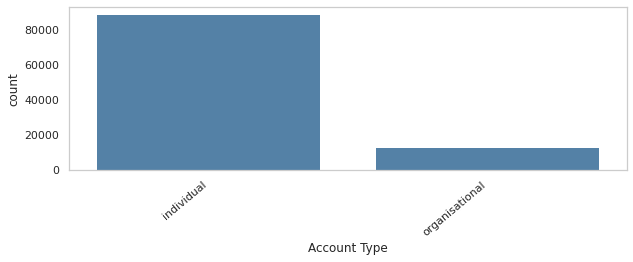

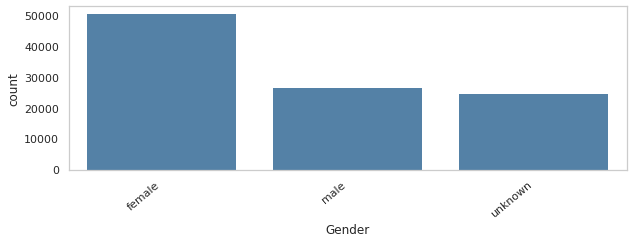

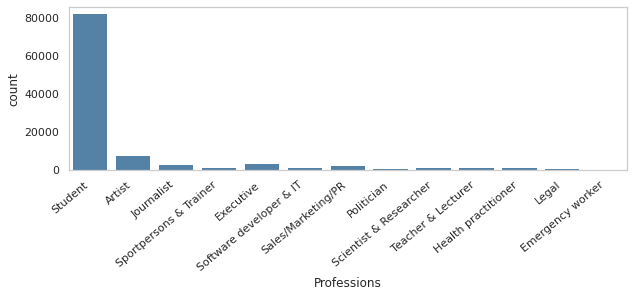

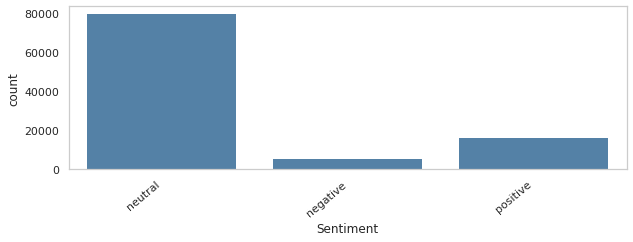

In [ ]:
for col in cat_cols:
    if col in ['Sentiment', 'Account Type', 'Gender', 'Professions']:
        count_plot(Data,col)

In [ ]:
def biplot(df, x_name, y_name):
    fig, ax = plt.subplots(figsize=(10,3))
    ax.grid(False)
    x = df[x_name]
    y = df[y_name]
    plt.scatter(x,y,c='blue', edgecolors='none',alpha=0.5)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('{x_name} vs. {y_name}'.format(x_name=x_name, y_name=y_name))
    plt.xticks(rotation=40)
    plt.show()


In [ ]:
Data['Sentiment'].value_counts()

neutral     79650
positive    16245
negative     5422
Name: Sentiment, dtype: int64

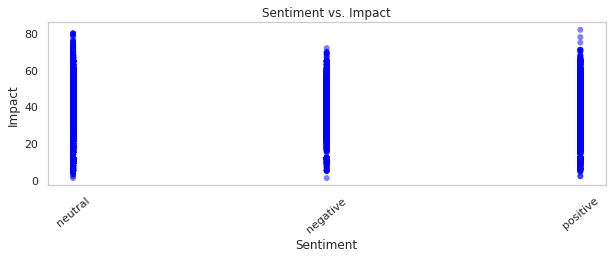

In [ ]:
biplot(df=Data,x_name='Sentiment',y_name='Impact')

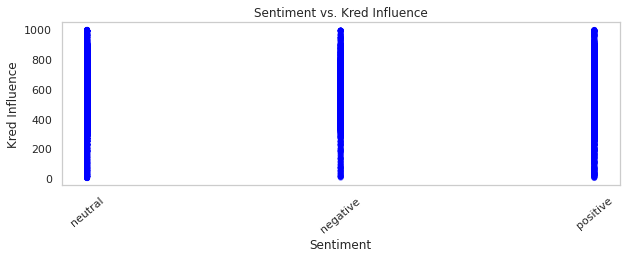

In [ ]:
biplot(df=Data,x_name='Sentiment',y_name='Kred Influence')

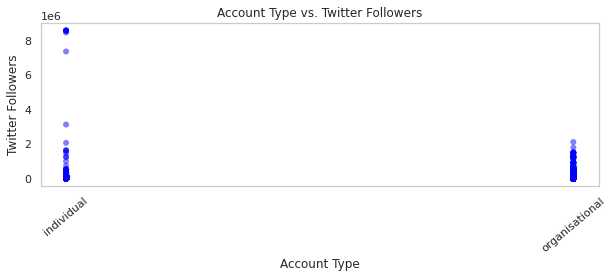

In [ ]:
biplot(df=Data,x_name='Account Type',y_name='Twitter Followers')

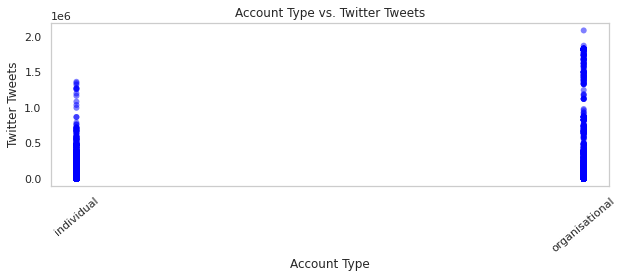

In [ ]:
biplot(df=Data,x_name='Account Type',y_name='Twitter Tweets')

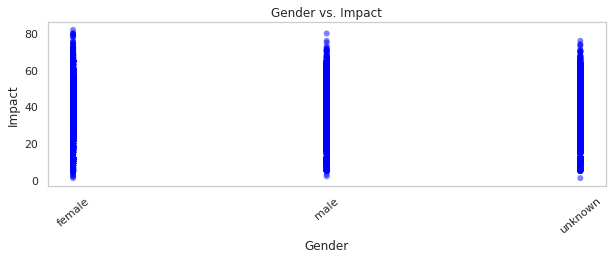

In [ ]:
biplot(df=Data,x_name='Gender',y_name='Impact')

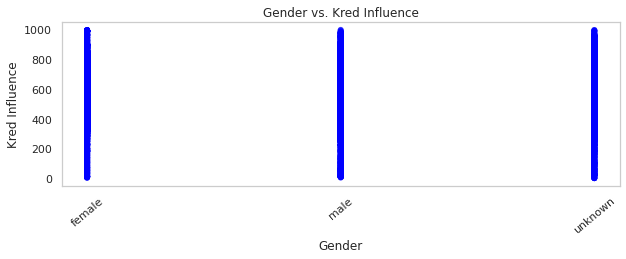

In [ ]:
biplot(df=Data,x_name='Gender',y_name='Kred Influence')

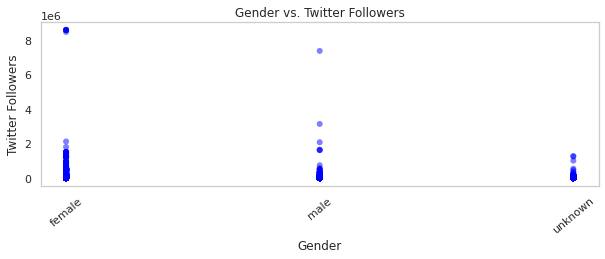

In [ ]:
biplot(df=Data,x_name='Gender',y_name='Twitter Followers')

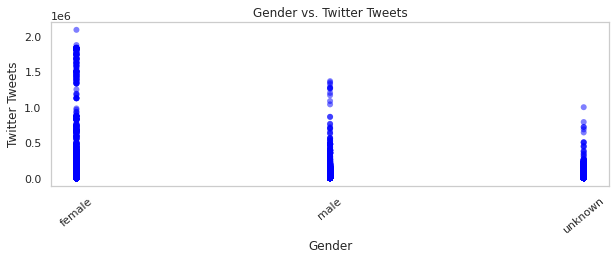

In [ ]:
biplot(df=Data,x_name='Gender',y_name='Twitter Tweets')

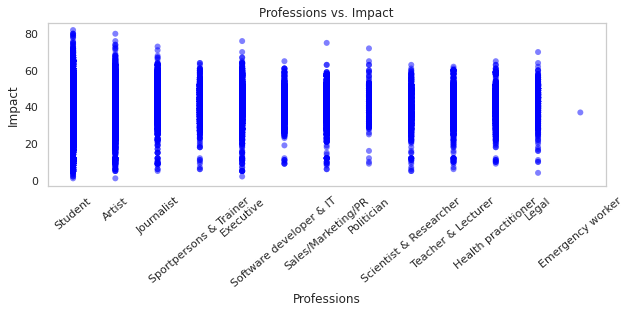

In [ ]:
biplot(df=Data,x_name='Professions',y_name='Impact')

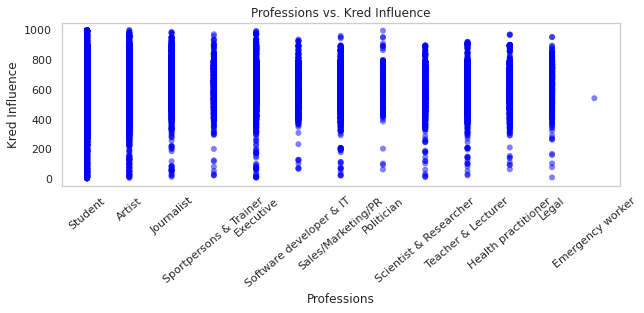

In [ ]:
biplot(df=Data,x_name='Professions',y_name='Kred Influence')

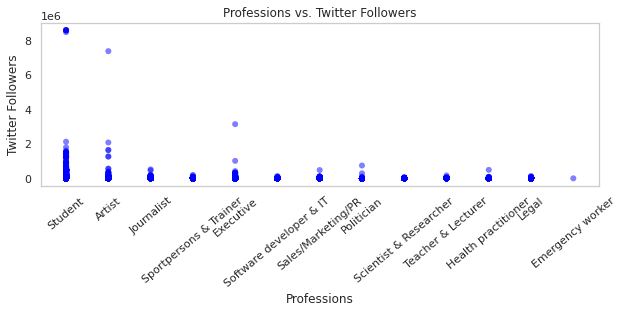

In [ ]:
biplot(df=Data,x_name='Professions',y_name='Twitter Followers')

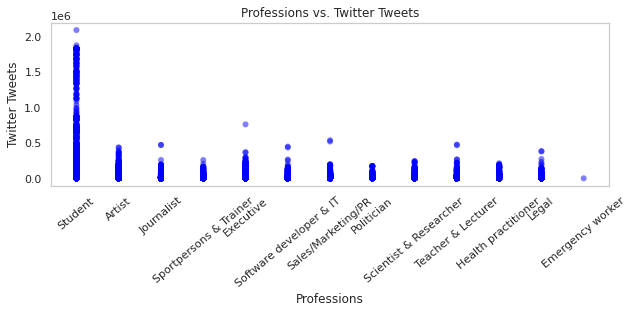

In [ ]:
biplot(df=Data,x_name='Professions',y_name='Twitter Tweets')

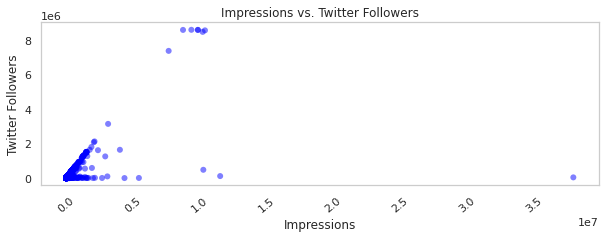

In [ ]:
biplot(df=Data,x_name='Impressions',y_name='Twitter Followers')

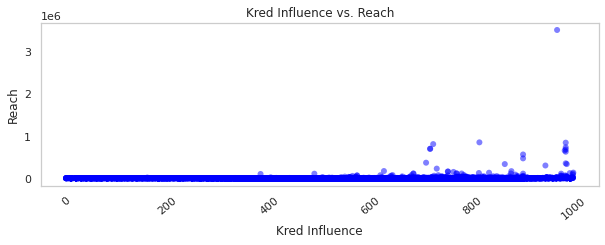

In [ ]:
biplot(df=Data,x_name='Kred Influence',y_name='Reach')

In [ ]:
#Encode all string values to numeric

dfVar = Data.copy()

from sklearn.preprocessing import LabelEncoder

def encode_df(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
        dataframe[column] = le.fit_transform(dataframe[column].astype(str))
    return dataframe

dfVar = encode_df(dfVar)

#Selecting and dropping features with variance threshold of 0.2 : 80% of values are similar

dfVar['addLabel']=0

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels=train_test_split(
    dfVar.drop(labels=['addLabel'], axis=1),
    dfVar['addLabel'],
    test_size=0.0001,
    random_state=1)

from sklearn.feature_selection import VarianceThreshold
zero_filter = VarianceThreshold(threshold=0.2)
zero_filter.fit(train_features)

non_constant_features = len(train_features.columns[zero_filter.get_support()])

print("Number of non-constant features (to keep): ", non_constant_features)

constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[zero_filter.get_support()]]

cols_to_keep = [column for column in train_features.columns
                    if column in train_features.columns[zero_filter.get_support()]]

print("Number of constant features with low variance: ", len(constant_columns))

print("All constant columns with low variance: \n")
for column in constant_columns:
    print(column)

Number of non-constant features (to keep):  13
Number of constant features with low variance:  1
All constant columns with low variance: 

Account Type


In [ ]:
# Installation of the Package follows the following steps:
# git clone https://github.com/shakedzy/dython.git
!pip install dython

In [ ]:

# Convert all the columns in float to integer for correlation plot as float is not handled
for y in Data.columns:
    if(y == 'Impact' or y == 'Impact' or y == 'Impressions' or y == 'Kred Influence' or y == 'Kred Outreach' or y == 'Reach' or y == 'Twitter Followers' or y == 'Twitter Following' or y == 'Twitter Reply Count' or y == 'Twitter Retweets' or y == 'Twitter Tweets'):
        Data[y] = Data[y].astype(int)

Data.dtypes


Sentiment              object
Account Type           object
Gender                 object
Impact                  int64
Impressions             int64
Kred Influence          int64
Kred Outreach           int64
Professions            object
Reach                   int64
Twitter Followers       int64
Twitter Following       int64
Twitter Reply Count     int64
Twitter Retweets        int64
Twitter Tweets          int64
dtype: object

In [ ]:
Data_Correlation = Data.copy()

In [ ]:
print(len(Data_Correlation))
print(len(Data_Correlation[Data_Correlation['Impressions'] == Data_Correlation['Twitter Followers']]))
print(len(Data_Correlation[Data_Correlation['Kred Influence'] == Data_Correlation['Reach']]))

101317
80580
91811


In [ ]:
Data_Correlation = Data_Correlation.drop(['Account Type', 'Impressions', 'Kred Influence'], axis=1)

In [ ]:
from dython.model_utils import roc_graph
from dython.nominal import associations

def associations_example():
    associations(Data_Correlation,nominal_columns=['Sentiment', 'Account Type', 'Gender', 'Professions'])

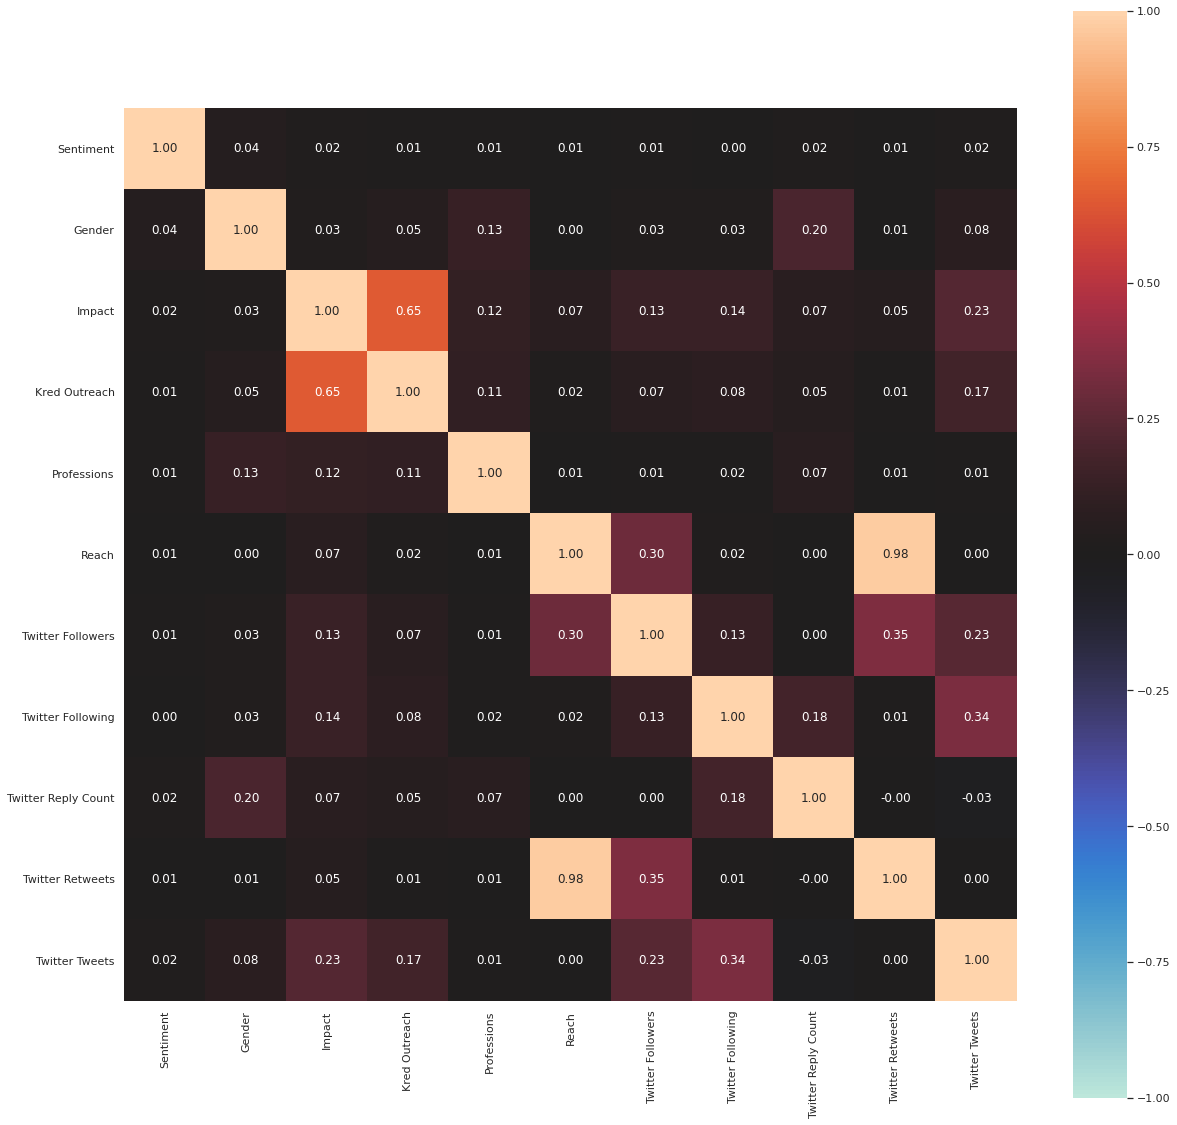

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20
associations_example()

In [ ]:
Data_Correlation.to_pickle("/content/drive/My Drive/data/DataCorrelation2.pkl")

In [ ]:
dfImpute['Thread Entry Type'].value_counts()

post       85398
reply      24068
unknown     1122
Name: Thread Entry Type, dtype: int64